# Exploratory Analysis

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading in the dataset 
df = pd.read_csv('categorized_ecommerce.csv', index_col=0, header=0, parse_dates=True, infer_datetime_format=True)
df.dtypes

Description     object
Quantity         int64
UnitPrice      float64
Country         object
Total          float64
Categories      object
dtype: object

### Let's focus on the numeric columns

In [3]:
#Resampling the dataset to weekly frequency
df = df.resample('W').sum()

In [4]:
#viewing the columns
df.columns

Index(['Quantity', 'UnitPrice', 'Total'], dtype='object')

In [5]:
#Quick peep of what the dataset entails
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2010-12-05 to 2011-12-11
Freq: W-SUN
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   54 non-null     int64  
 1   UnitPrice  54 non-null     float64
 2   Total      54 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


In [6]:
#Viewing the number of rows and columns respectively
df.shape

(54, 3)

In [7]:
#calculating the number of days in the dataset
min_date = df.index.min()
max_date =  df.index.max()
range = max_date - min_date

In [8]:
print('The range for the dataset is', range)

The range for the dataset is 371 days 00:00:00


In [9]:
#A summary of the descriptive statistics of the dataset
round(df.describe(), 1)

,Quantity,UnitPrice,Total
count,54.0,54.0,54.0
mean,103132.3,35800.6,193967.8
std,42186.1,15451.0,86518.9
min,0.0,0.0,0.0
25%,77855.8,26255.4,137688.0
50%,97514.5,30923.3,175284.2
75%,119670.2,39493.9,217592.7
max,244998.0,74664.0,501864.0


### There are a few noteworthy points to highlight about the dataset. Firstly, the dataset exhibits a right-skewed distribution. How can we determine this from the summary statistics? Well, when the mean value of a dataset is greater than the median value, it indicates that the mean is shifted towards the right side of a hypothetical histogram if we were to plot it. This observation implies that the tail of the dataset extends towards the right side of the histogram.

### Additionally, it is worth noting that for all the numeric columns in the dataset, the mean values are consistently higher than the corresponding median values.

In [10]:
#Removing values that have Quantity to be less than 0
df = df.query('Quantity>0')

In [11]:
df.head()

,Quantity,UnitPrice,Total
InvoiceDate,,,
2010-12-05,90734,37775.02,184398.8
2010-12-12,121539,73560.53,313599.1
2010-12-19,107047,46871.47,214538.0
2010-12-26,39295,24261.80,90357.2
2011-01-09,76782,24697.98,132445.2


In [12]:
## Viewing the descriptive stats for the numeric columns of the dataset
round(df.describe(), 1)

,Quantity,UnitPrice,Total
count,53.0,53.0,53.0
mean,105078.2,36476.1,197627.6
std,40068.6,14772.0,83019.8
min,39295.0,17602.1,85073.0
25%,77945.0,26364.8,137736.2
50%,97834.0,31141.9,175305.0
75%,120278.0,39923.6,218610.9
max,244998.0,74664.0,501864.0


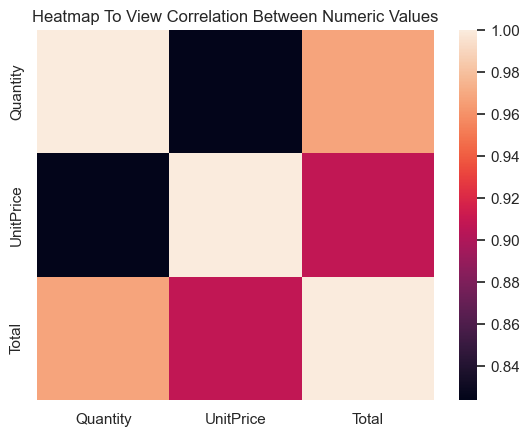

In [13]:
#plotting a heatmap to view the correlation amongst numeric columns
sns.heatmap(df.corr())
plt.title('Heatmap To View Correlation Between Numeric Values')
plt.show()

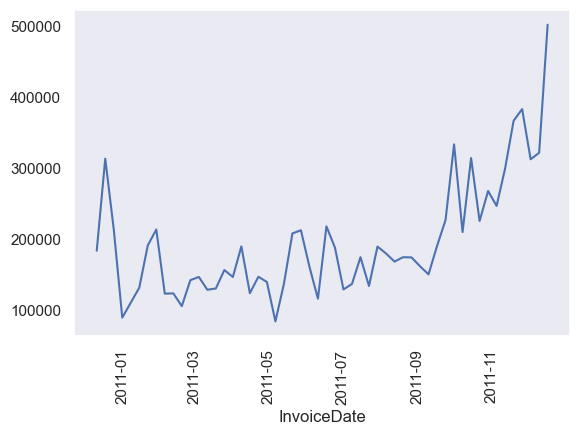

In [14]:
#A line plot to view the trend in the dataset for the numeric values
df['Total'].plot()
plt.xticks(rotation=90)
plt.show()

### Regarding the dataset's trend, a clear upward trend can be observed simply by examining the graph. There doesn't appear to be any significant seasonality, where specific periods with consistent time intervals affect the shop's sales. However, it's important to note that since the dataset covers a little over a year, it may not provide a comprehensive view of this aspect. Nevertheless, one notable observation is that the trend starts at a high point in the beginning and also ends at a high point. The data includes holiday periods, specifically Christmas and New Year, which are known for generating high sales for the shop. Further analysis will be provided on this topic. 

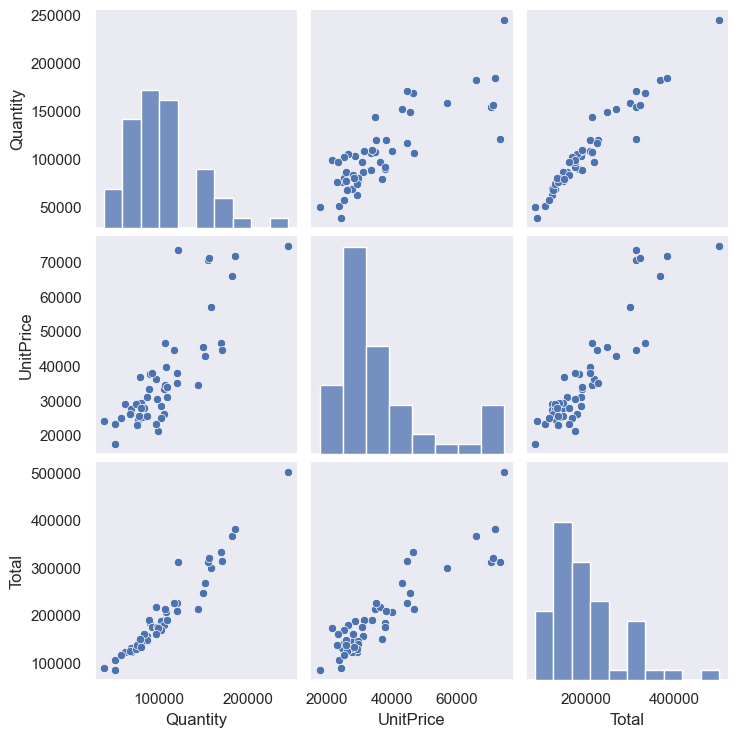

In [15]:
# Viewing a plot to show both histograms and scatter plota for the numeric values
sns.pairplot(df)
plt.xlabel('Values')
plt.ylabel('Quantity                     UnitPrice                      Total')
plt.show()

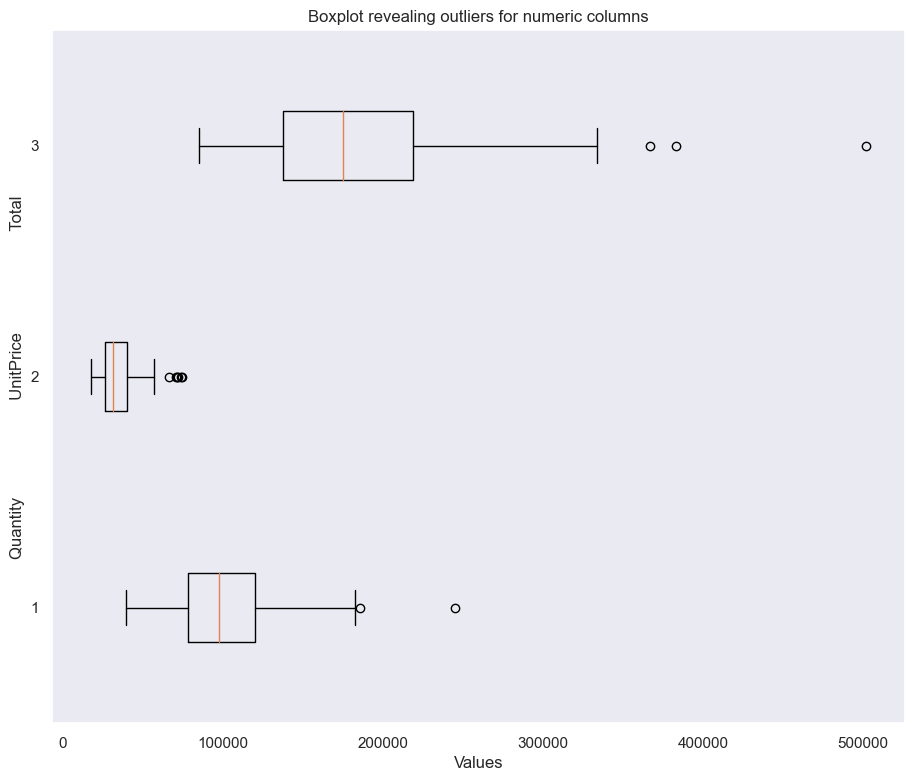

In [16]:
plt.figure(figsize=(11, 9))
plt.boxplot(df, vert=False)
plt.xlabel('Values')
plt.ylabel('Quantity                     UnitPrice                      Total')
plt.title('Boxplot revealing outliers for numeric columns')
plt.show()

In [17]:
df = df.query('Total<260000')

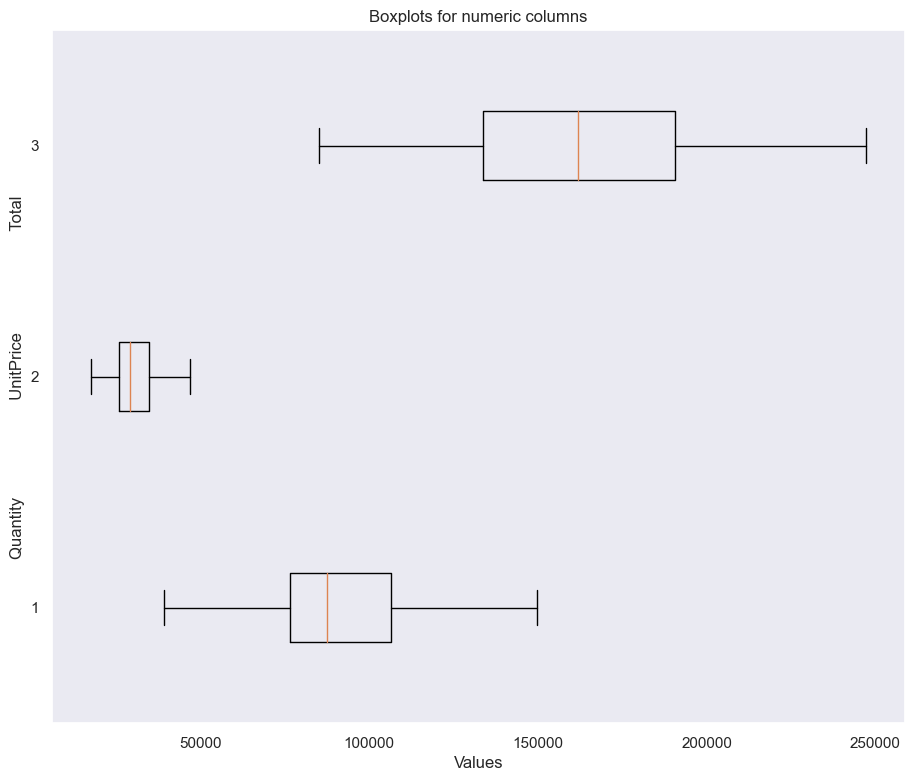

In [18]:
plt.figure(figsize=(11, 9))
plt.boxplot(df, vert=False)
plt.xlabel('Values')
plt.ylabel('Quantity                     UnitPrice                      Total')
plt.title('Boxplots for numeric columns')
plt.show()

### In the previous boxplot, it was evident that the dataset contained outliers, represented by small circles in the graph. However, these outliers have been addressed and removed, as demonstrated in the updated boxplot. The new boxplot provides us with several notable observations.

### One notable observation is that the columns in the dataset exhibit right-skewedness. This can be observed in the first plot, where the length of the right whisker is longer than the left whisker, indicating the presence of right-skewed distribution. Similar observations can be made for the other boxes in the boxplot.

### In terms of the range of the dataset, the 'Total' column exhibits the widest range, spanning from 100,000 to 250,000. On the other hand, the 'Unitprice' column has the smallest range, ranging from approximately 1,500 to just over 5,000. Finally, the last column ranges from slightly below 5,000 to slightly above 150,000.

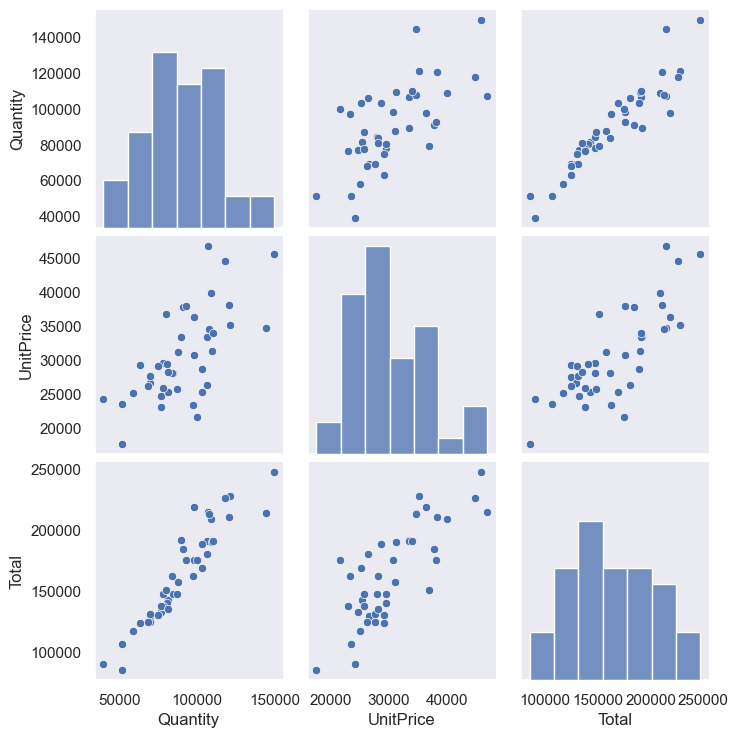

In [19]:
sns.pairplot(df)
plt.xticks(rotation=90)
plt.show()

#### Let's examine the scatterplots. The scatterplots illustrate a linear relationship between the 'Total' and 'Quantity' columns, indicating that as the number of items purchased increases, the total also increases. The reverse is true as well. Additionally, all the histograms demonstrate right-skewed distributions and have no outliers. 

#### Furthermore, the remaining scatterplots exhibit some form of positive linear relationships, although they are not consistently strong or solid.




~~~SQL
--Viewing countries with the highest and lowest sales
SELECT 
    Country,
	COUNT(Categories) AS count_of_items,
	CONCAT(ROUND((COUNT(Categories) * 100.0 / (SELECT COUNT(Categories) FROM sql_ecommerce)), 4), ' ', '%') AS count_percentage,
    ROUND(SUM(Total), 0) AS total_sales,
    CONCAT(SUM(Total) / (SELECT SUM(Total) FROM sql_ecommerce) * 100.0, ' ', '%') AS sales_percentage
FROM
    sql_ecommerce
GROUP BY
    Country
ORDER BY total_sales DESC;

~~~

Country | count_of_items | count_percentage | total_sales | sales_percentage
------- | -------------- | ---------------- | ----------- | ----------------
UNITED KINGDOM | 484258 | 91.788900000000 % | 8951390 | 85.4608 %
NETHERLANDS | 2321 | 0.439900000000 % | 283756 | 2.70908 %
IRELAND | 7882 | 1.494000000000 % | 276367 | 2.63853 %
GERMANY | 8652 | 1.639900000000 % | 205520 | 1.96215 %
FRANCE | 8083 | 1.532100000000 % | 184502 | 1.76148 %
AUSTRALIA | 1181 | 0.223900000000 % | 138169 | 1.31913 %
SPAIN | 2419 | 0.458500000000 % | 55691 | 0.531696 %
SWITZERLAND | 1935 | 0.366800000000 % | 53089 | 0.50685 %
JAPAN | 321 | 0.060800000000 % | 37415 | 0.357205 %
BELGIUM | 1935 | 0.366800000000 % | 36928 | 0.352557 %
SWEDEN | 428 | 0.081100000000 % | 36839 | 0.351709 %
NORWAY | 1048 | 0.198600000000 % | 32454 | 0.309847 %
PORTUGAL | 1462 | 0.277100000000 % | 26984 | 0.257618 %
CHANNEL ISLANDS | 747 | 0.141600000000 % | 20158 | 0.192451 %
FINLAND | 646 | 0.122400000000 % | 18336 | 0.175054 %
DENMARK | 365 | 0.069200000000 % | 18171 | 0.173485 %
ITALY | 741 | 0.140500000000 % | 15821 | 0.151045 %
CYPRUS | 611 | 0.115800000000 % | 13254 | 0.126544 %
HONG KONG | 278 | 0.052700000000 % | 9944 | 0.0949356 %
SINGAPORE | 214 | 0.040600000000 % | 9090 | 0.0867851 %
AUSTRIA | 384 | 0.072800000000 % | 8742 | 0.0834598 %
ISRAEL | 295 | 0.055900000000 % | 8135 | 0.0776713 %
POLAND | 325 | 0.061600000000 % | 6975 | 0.0665918 %
GREECE | 142 | 0.026900000000 % | 4426 | 0.0422521 %
ICELAND | 182 | 0.034500000000 % | 4310 | 0.0411485 %
USA | 179 | 0.033900000000 % | 3580 | 0.0341819 %
CANADA | 148 | 0.028100000000 % | 3096 | 0.0295582 %
MALTA | 109 | 0.020700000000 % | 2070 | 0.0197637 %
UNITED ARAB EMIRATES | 67 | 0.012700000000 % | 1865 | 0.0178017 %
LEBANON | 45 | 0.008500000000 % | 1694 | 0.016173 %
LITHUANIA | 35 | 0.006600000000 % | 1661 | 0.0158589 %
BRAZIL | 32 | 0.006100000000 % | 1143 | 0.0109163 %
SOUTH AFRICA | 57 | 0.010800000000 % | 1002 | 0.00956821 %
CZECH REPUBLIC | 24 | 0.004500000000 % | 787 | 0.00751175 %
BAHRAIN | 18 | 0.003400000000 % | 754 | 0.00719955 %
SAUDI ARABIA | 9 | 0.001700000000 % | 146 | 0.00139294 %


### The table presented above provides insights into the sales distribution across different countries. It reveals that the United Kingdom, which is the country where the shop is located, generates a significant portion of the company's sales, contributing approximately 85% of the total sales. This dominance is also reflected in the count of items sold, where the United Kingdom accounts for 91% of the items sold.

### In contrast, Saudi Arabia is positioned at the bottom of the list, with only 10 items associated with its name, representing a mere 0.001312% of the company's total sales. This indicates a relatively smaller contribution from Saudi Arabia compared to other countries in terms of both sales value and item count.

~~~SQL

--Counting the total sales for each category
SELECT  
	Categories AS Category, 
	COUNT(Categories) AS count_of_items,
	ROUND(SUM(Total), 1) AS Total_sales_for_category, 
	CONCAT(ROUND((COUNT(Categories) * 100.0 / (SELECT COUNT(Categories) FROM sql_ecommerce)), 4), ' ', '%') AS count_percentage,
	RANK() OVER (ORDER BY COUNT(Categories) DESC) AS category_rank
FROM sql_ecommerce
GROUP BY Categories
ORDER BY Total_sales_for_category DESC;

~~~

Category | count_of_items | Total_sales_for_category | count_percentage | category_rank
------- | -------------- | ----------------------- | ---------------- | -------------
HOME AND OFFICE DECOR | 327647 | 6652228.1 | 62.104000000000 % | 1
GIFTS | 133714 | 2705304.6 | 25.344900000000 % | 2
SIGNS | 31561 | 563558.7 | 5.982200000000 % | 3
PERSONAL | 9133 | 256051 | 1.731100000000 % | 5
STATIONARY | 19486 | 173739.3 | 3.693500000000 % | 4
JEWELRY | 6037 | 123382 | 1.144300000000 % | 6


### When it comes to the category section, the Home And Office Decor category takes the lead. With a count of items surpassing three hundred thousand and total sales exceeding six million pounds, it accounts for approximately 62% of the total items sold, making it the top category in terms of both count and sales.




### The jewelry category is trailing behind other categories. With a count of items slightly over six thousand and total sales around one hundred and twenty thousand pounds, it represents only one percent of the total items sold. Compared to other categories, the jewelry category has a relatively smaller presence in terms of both count and sales.

~~~SQL
--Viewing sales by month
SELECT
	sub.Months, 
	sub.Total_for_month, 
	COALESCE(ROUND(Total_for_month - LAG(Total_for_month) OVER (ORDER BY Months), 2), 0) AS MoM_change, 
	CONCAT(ROUND((COALESCE(ROUND(Total_for_month - LAG(Total_for_month) OVER (ORDER BY Months), 2), 0) / Total_for_month) *100.0, 2), ' ', '%') AS Pct_change
FROM (
SELECT
    MONTH(InvoiceDate) AS Months,
    ROUND(SUM(Total), 1) AS Total_for_month
FROM
    sql_ecommerce
GROUP BY
    MONTH(InvoiceDate)
	) sub
ORDER BY sub.Months 
~~~

Months | Total_for_month | MoM_change | Pct_change
------ | --------------- | ---------- | ----------
1 | 685826 | 0 | 0 %
2 | 518893.6 | -166932.4 | -32.17 %
3 | 703398.8 | 184505.2 | 26.23 %
4 | 523306.7 | -180092.1 | -34.41 %
5 | 750444.5 | 227137.8 | 30.27 %
6 | 750184 | -260.5 | -0.03 %
7 | 700387.7 | -49796.3 | -7.11 %
8 | 738375 | 37987.3 | 5.14 %
9 | 1045989.7 | 307614.7 | 29.41 %
10 | 1124990.4 | 79000.7 | 7.02 %
11 | 1494224.7 | 369234.3 | 24.71 %
12 | 1438242.6 | -55982.1 | -3.89 %


In [42]:
##Turning the above into a pandas dataframe
sales_changes = {
    'Months': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Total_for_months': [685826, 518893.6, 703398.8, 523306.7,750444.5,750184,700387.7,738375,1045989.7,1124990.4,1494224.7,1438242.6],
    'MoM_change': [0,-166932.4,184505.2, -180092.1, 227137.8, -260.5, -49796.3, 37987.3, 307614.7, 79000.7, 369234.3, -55982.1],
    'Pct_change': [0, -32.17,26.23,-34.41,30.27,-0.03,-7.11,5.14,29.41,7.02,24.71,-3.89]
                 }
sales_change = pd.DataFrame(sales_changes)
sales_change = sales_change.set_index(['Months'])

print(sales_change)

        Total_for_months  MoM_change  Pct_change
Months                                          
1               685826.0         0.0        0.00
2               518893.6   -166932.4      -32.17
3               703398.8    184505.2       26.23
4               523306.7   -180092.1      -34.41
5               750444.5    227137.8       30.27
6               750184.0      -260.5       -0.03
7               700387.7    -49796.3       -7.11
8               738375.0     37987.3        5.14
9              1045989.7    307614.7       29.41
10             1124990.4     79000.7        7.02
11             1494224.7    369234.3       24.71
12             1438242.6    -55982.1       -3.89


In [43]:
sales_MoM = pd.DataFrame(sales_change)

In [44]:
sales_MoM

,Total_for_months,MoM_change,Pct_change
Months,,,
1,685826.0,0.0,0.00
2,518893.6,-166932.4,-32.17
3,703398.8,184505.2,26.23
4,523306.7,-180092.1,-34.41
5,750444.5,227137.8,30.27
6,750184.0,-260.5,-0.03
7,700387.7,-49796.3,-7.11
8,738375.0,37987.3,5.14
9,1045989.7,307614.7,29.41


In [45]:
## Quick peep of what the table entails
sales_MoM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total_for_months  12 non-null     float64
 1   MoM_change        12 non-null     float64
 2   Pct_change        12 non-null     float64
dtypes: float64(3)
memory usage: 384.0 bytes


In [46]:
##Separating the percent change into a different dataframe
sales_MoM['Pct_change']

Months
1      0.00
2    -32.17
3     26.23
4    -34.41
5     30.27
6     -0.03
7     -7.11
8      5.14
9     29.41
10     7.02
11    24.71
12    -3.89
Name: Pct_change, dtype: float64

In [47]:
## Creating the dataframe with sales_Mom['Pct_change']
Pct_change = pd.DataFrame(sales_MoM['Pct_change'])

In [48]:
## Viewing dataframe
Pct_change

,Pct_change
Months,
1,0.00
2,-32.17
3,26.23
4,-34.41
5,30.27
6,-0.03
7,-7.11
8,5.14
9,29.41


In [40]:
Pct_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pct_change  12 non-null     object
dtypes: object(1)
memory usage: 192.0+ bytes


In [49]:
Pct_change = Pct_change['Pct_change'].astype(float)

In [50]:
Pct_change

Months
1      0.00
2    -32.17
3     26.23
4    -34.41
5     30.27
6     -0.03
7     -7.11
8      5.14
9     29.41
10     7.02
11    24.71
12    -3.89
Name: Pct_change, dtype: float64

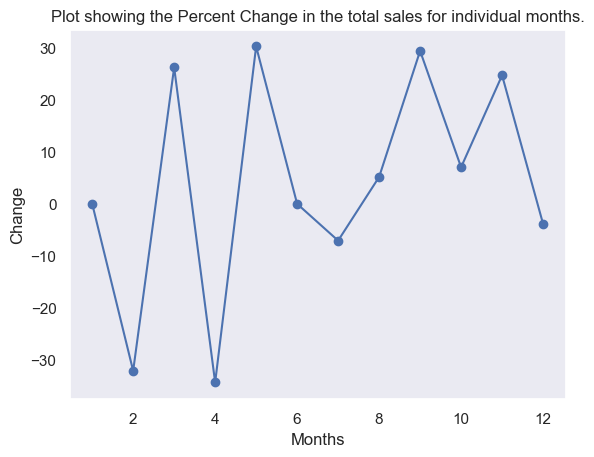

In [51]:
Pct_change.plot(marker='o')
plt.xlabel('Months')
plt.ylabel('Change')
plt.title('Plot showing the Percent Change in the total sales for individual months.')
plt.show()

### The store's sales performance has shown significant fluctuations, particularly in the initial months. Starting from late December of the previous year to February, there was a notable drop of 32% in sales, followed by a recovery of 26%. However, this was followed by another drop of 34%, which was then followed by a substantial rise of 30%. The remaining months of the year did not experience such drastic fluctuations in sales performance.

# Conclusions

### 1. Dataset Distribution: The dataset exhibits a right-skewed distribution. The mean values of all numeric columns are consistently higher than their corresponding median values, indicating a right-skewed trend.

### 2. Trend and Seasonality: The dataset shows a clear upward trend in sales over the observed period. However, there seems to be no significant seasonality, as specific periods with consistent time intervals do not significantly affect the shop's sales.

### 3. Outliers: The previous boxplot revealed outliers in the dataset, but they have been addressed and removed in the updated boxplot. This resulted in several notable observations regarding the dataset's right-skewedness and the presence of outliers in other boxes.

### 4. Range of the Dataset: The 'Total' column has the widest range, spanning from 100,000 to 250,000, while the 'Unitprice' column has the smallest range, ranging from approximately 1,500 to just over 5,000. The last column ranges from slightly below 50,000 to slightly above 150,000.

### 5. UK's Dominance: The sales distribution across countries reveals that the United Kingdom, where the shop is located, contributes approximately 85% of the company's total sales. Additionally, the United Kingdom accounts for 91% of the items sold, showcasing its dominance in the dataset.

### Concluding the exploratory data analysis, it is evident that the store's sales performance has shown significant fluctuations, especially in the initial months. However, the United Kingdom remains a dominant contributor to the company's overall sales.